In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import dates,ticker
from matplotlib.finance import candlestick_ohlc
mpl.style.use("default")

In [2]:
data = pd.read_csv("data.csv",parse_dates=["Date"])
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2017-04-03,9220.6,9245.35,9192.40,9237.85,143444541,8337.06
1,2017-04-05,9264.4,9273.90,9215.40,9265.15,190529461,11461.96
2,2017-04-06,9245.8,9267.95,9218.85,9261.95,191937207,10332.60
3,2017-04-07,9223.7,9250.50,9188.10,9198.30,195918747,10217.13
4,2017-04-10,9225.6,9225.65,9174.85,9181.45,139968750,8140.08


In [3]:
data.drop(data.index[17],inplace=True)

In [4]:
data["Shares Traded"] = data["Shares Traded"].astype(int)

In [5]:
data["Turnover (Rs. Cr)"] = data["Turnover (Rs. Cr)"].astype(float)

In [6]:
data["Date"] = data["Date"].apply(lambda x : dates.date2num(x))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 27
Data columns (total 7 columns):
Date                 27 non-null float64
Open                 27 non-null float64
High                 27 non-null float64
Low                  27 non-null float64
Close                27 non-null float64
Shares Traded        27 non-null int32
Turnover (Rs. Cr)    27 non-null float64
dtypes: float64(6), int32(1)
memory usage: 1.6 KB


In [8]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,736422.0,9220.6,9245.35,9192.40,9237.85,143444541,8337.06
1,736424.0,9264.4,9273.90,9215.40,9265.15,190529461,11461.96
2,736425.0,9245.8,9267.95,9218.85,9261.95,191937207,10332.60
3,736426.0,9223.7,9250.50,9188.10,9198.30,195918747,10217.13
4,736429.0,9225.6,9225.65,9174.85,9181.45,139968750,8140.08


In [9]:
subset = data[["Date","Open","High","Low","Close"]]
tuples_for_ohlc = [tuple(x) for x in subset.values]

In [10]:
tuples_for_ohlc[:2]

[(736422.0,
  9220.6000000000004,
  9245.3500000000004,
  9192.3999999999996,
  9237.8500000000004),
 (736424.0,
  9264.3999999999996,
  9273.8999999999996,
  9215.3999999999996,
  9265.1499999999996)]

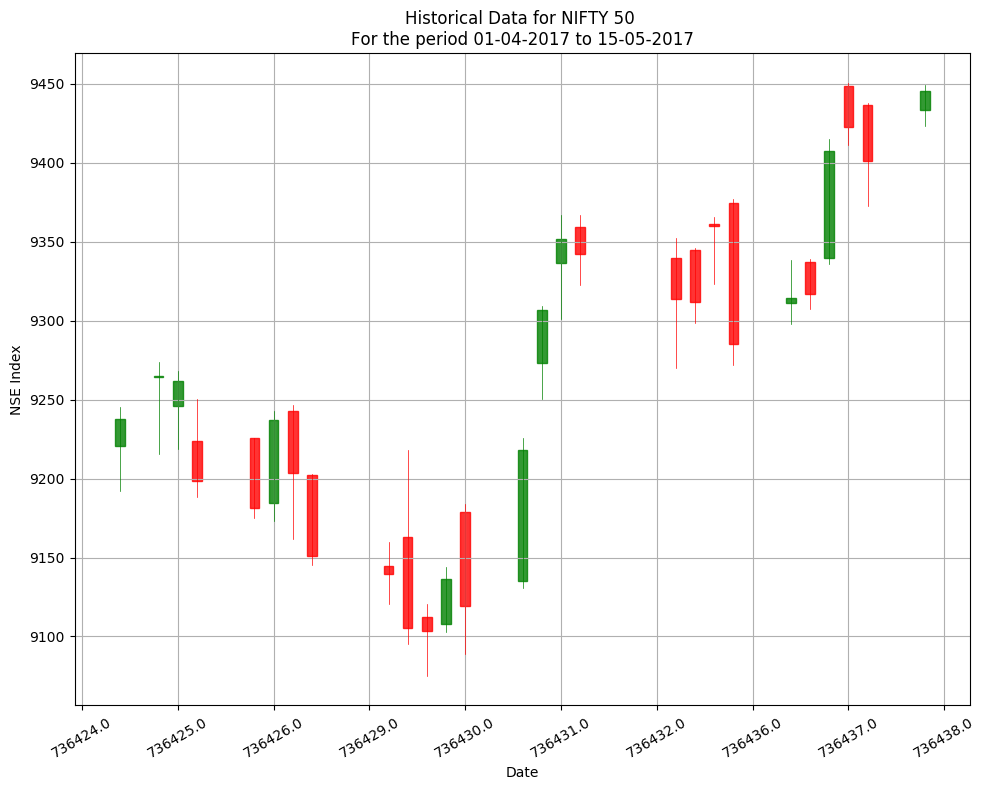

In [11]:
fig,ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)


dayFormatter =dates.DateFormatter('%d-%b-%Y')
candlestick_ohlc(ax,tuples_for_ohlc,width=0.5,colorup="g",colordown="r",alpha = 0.8)
ax.xaxis.set_major_formatter(dayFormatter)
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

ax.set_xticklabels(data.Date,rotation=30)
ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('NSE Index')
ax.set_title('Historical Data for NIFTY 50 \nFor the period 01-04-2017 to 15-05-2017')
plt.tight_layout()
plt.show()
plt.show()